In [332]:
import pandas as pd
import seaborn as sns

## 1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения.

In [333]:
df = pd.read_csv("./dataset_var1.csv", sep=";", names=["f1", "f2", "f3", "f4", "f5", "f6", "f7", "target"])
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,NaN,-0.773345,-0.002400,0.530888,-1.058400,-1.781132,0.189430,-92.221092
1,NaN,-0.886568,1.276297,0.665747,-0.378063,-0.658522,-0.945419,-26.926821
2,NaN,1.356491,0.034605,0.290838,0.310534,-1.067264,2.031287,-44.844748
3,NaN,-0.799755,0.257057,-0.563355,0.745641,0.869313,-0.403485,25.440314
4,NaN,-1.268300,0.003044,-0.270158,0.983069,0.523440,-0.497699,12.903885


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      30 non-null     float64
 1   f2      100 non-null    float64
 2   f3      95 non-null     float64
 3   f4      100 non-null    float64
 4   f5      100 non-null    float64
 5   f6      100 non-null    float64
 6   f7      100 non-null    float64
 7   target  100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [335]:
df.isna().sum()

f1        70
f2         0
f3         5
f4         0
f5         0
f6         0
f7         0
target     0
dtype: int64

Пропуски имеются у признаков f1 (70 пропусков) и f3 (5 пропусков).

Значит, можно удалить столбец, отвечающий за признак f1, так как он содержит слишком большое количество пропоусков в данной выборке. Затем удалить 5 строк с пропусками, содержащимися в столбце признака f3.

In [336]:
df = df.drop("f1", axis=1)

In [337]:
df = df.dropna()

In [338]:
df.isna().sum()

f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
target    0
dtype: int64

## 2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [339]:
df.describe()

,f2,f3,f4,f5,f6,f7,target
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.009077,0.075745,-0.104527,-0.429516,0.057728,-0.033976,1.313663
std,0.978384,0.915116,1.119789,2.569870,1.045000,0.994065,55.358232
min,-2.790680,-2.493577,-2.849004,-13.695448,-2.023200,-2.854785,-118.843758
25%,-0.576756,-0.544945,-0.842316,-0.645654,-0.783461,-0.668729,-38.423600
50%,-0.005320,-0.002400,-0.165677,-0.023578,-0.126571,-0.052732,-2.371281
75%,0.625509,0.653803,0.590943,0.879546,0.869232,0.641029,40.775502
max,2.432896,2.387574,2.847169,2.295718,2.819094,2.357365,144.111188


In [340]:
corr_matrix = df.corr().round(3)
corr_matrix

,f2,f3,f4,f5,f6,f7,target
f2,1.000,-0.129,0.040,-0.044,0.076,0.176,0.220
f3,-0.129,1.000,-0.121,0.202,-0.027,-0.133,-0.075
f4,0.040,-0.121,1.000,-0.131,-0.044,-0.007,0.251
f5,-0.044,0.202,-0.131,1.000,-0.022,0.038,-0.048
f6,0.076,-0.027,-0.044,-0.022,1.000,0.050,0.945
f7,0.176,-0.133,-0.007,0.038,0.050,1.000,0.074
target,0.220,-0.075,0.251,-0.048,0.945,0.074,1.000


<AxesSubplot: >

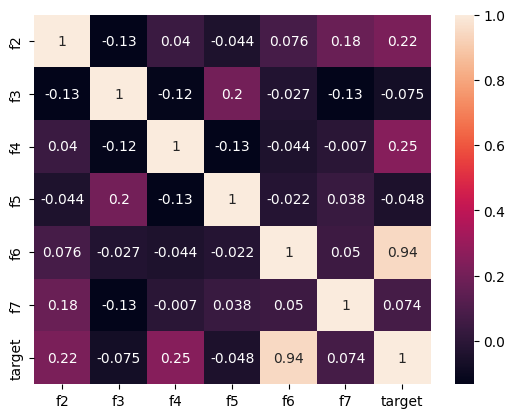

In [341]:
sns.heatmap(corr_matrix, annot=True)

Проанализировав корреляционную матрицу, можно сделать вывод, что признаки f3, f5 и f7 слабо коррелируют с целевой переменной, между собой эти признаки также слабо коррелируют => встает вопрос, удалять их из выборки или нет... Допускается, что совокупность этих признаков в итоге, может скрыто влиять на целевую переменную.

In [342]:
# df = df.drop("f3", axis=1)
# df = df.drop("f5", axis=1)
# df
df

,f2,f3,f4,f5,f6,f7,target
0,-0.773345,-0.002400,0.530888,-1.058400,-1.781132,0.189430,-92.221092
1,-0.886568,1.276297,0.665747,-0.378063,-0.658522,-0.945419,-26.926821
2,1.356491,0.034605,0.290838,0.310534,-1.067264,2.031287,-44.844748
3,-0.799755,0.257057,-0.563355,0.745641,0.869313,-0.403485,25.440314
4,-1.268300,0.003044,-0.270158,0.983069,0.523440,-0.497699,12.903885
...,...,...,...,...,...,...,...
95,0.058529,-0.250057,-1.787525,0.688256,1.660757,0.444225,62.282408
96,0.596657,0.076337,1.262697,0.342786,-0.159626,1.128755,15.724642
97,0.671538,0.276274,1.275723,-0.045361,-0.225269,1.314845,15.942829
98,0.480736,-0.293525,1.931961,1.090415,0.998431,0.399571,84.279306


<AxesSubplot: >

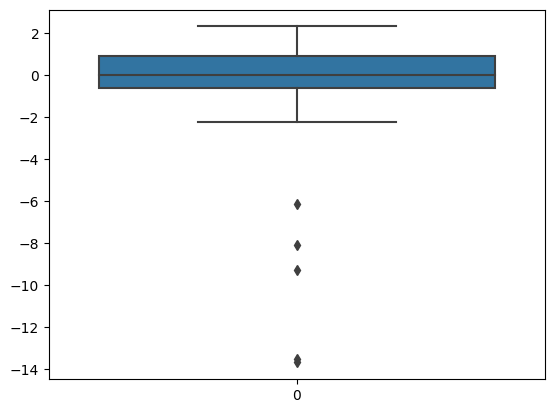

In [343]:
sns.boxplot(df.f5)

Избавимся от выбросов в каждом признаке.

In [344]:
df = df.loc[df['f2'] >= -2]
df = df.loc[df['f2'] <= 2.5]
df = df.loc[df['f3'] >= -2]
df = df.loc[df['f4'] <= 2.5]
df = df.loc[df['f5'] >= -2.5]

## 3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [345]:
from sklearn.model_selection import train_test_split

x = df.drop("target", axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

## 4. Для предсказания целевого признака постройте следующие модели, используя библиотеку sklearn:

### a) Линейная регрессия LinearRegression()

In [346]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.score(x_test, y_test))

0.9959845516089998


### b. Случайный лес RandomForestRegressor()

In [347]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
print(rfr.score(x_test, y_test))

0.9219362089466053


### c. Метод ближайших соседей KNeighborsRegressor()

In [358]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=2, weights='distance', p=2)
knr.fit(x_train, y_train)
print(knr.score(x_test, y_test))

0.7633456501020669


### d. Метод опорных векторов SVR()

In [349]:
from sklearn.svm import SVR

svr = SVR(C=100)
svr.fit(x_train, y_train)
print(svr.score(x_test, y_test))

0.8701643182472123


### e. Логистическая регрессия LogisticRegression()

In [350]:
#

Наилучший результат дала модель LinearRegressin() - 0.99

In [351]:
print(linr.coef_)

[ 6.92823369 -0.06299248 14.43116891  1.48422822 50.72686544  0.24273772]


При аналиизе, было замечено, что признаки f3, f5 и f7 не влияют на целевую переменную, так и вышло, их можно было спокойно удалить.

Больше всего на результат имеет признак f6, затем f4, затем f2.